# Demo: Modeling MNIST dataset by using Classification

## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load MNIST dataset

In [5]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target
y = y.astype(np.uint8)  # Convert labels to integers

## Date preprocessing

In [6]:
# Split into training and test sets (60k/10k)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42
)

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


## Model training using LogisticRegression-Model

In [ ]:
# Initialize and train logistic regression model
model = LogisticRegression(
    solver='saga',        # Optimized for large datasets
    max_iter=250,         # Increase if convergence warning appears
    n_jobs=-1,            # Use all available cores
    verbose=1
)
model.fit(X_train, y_train)



C:\Users\weber\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 290 seconds


C:\Users\weber\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', n_jobs=-1, solver='saga',
                   verbose=1)

## Model evaluation

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 92.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       983
           1       0.95      0.97      0.96      1152
           2       0.91      0.90      0.90       967
           3       0.89      0.90      0.89      1034
           4       0.92      0.93      0.93       906
           5       0.88      0.88      0.88       937
           6       0.93      0.95      0.94       961
           7       0.93      0.94      0.94      1055
           8       0.90      0.86      0.88       969
           9       0.92      0.91      0.91      1036

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Visualization of model results and performance

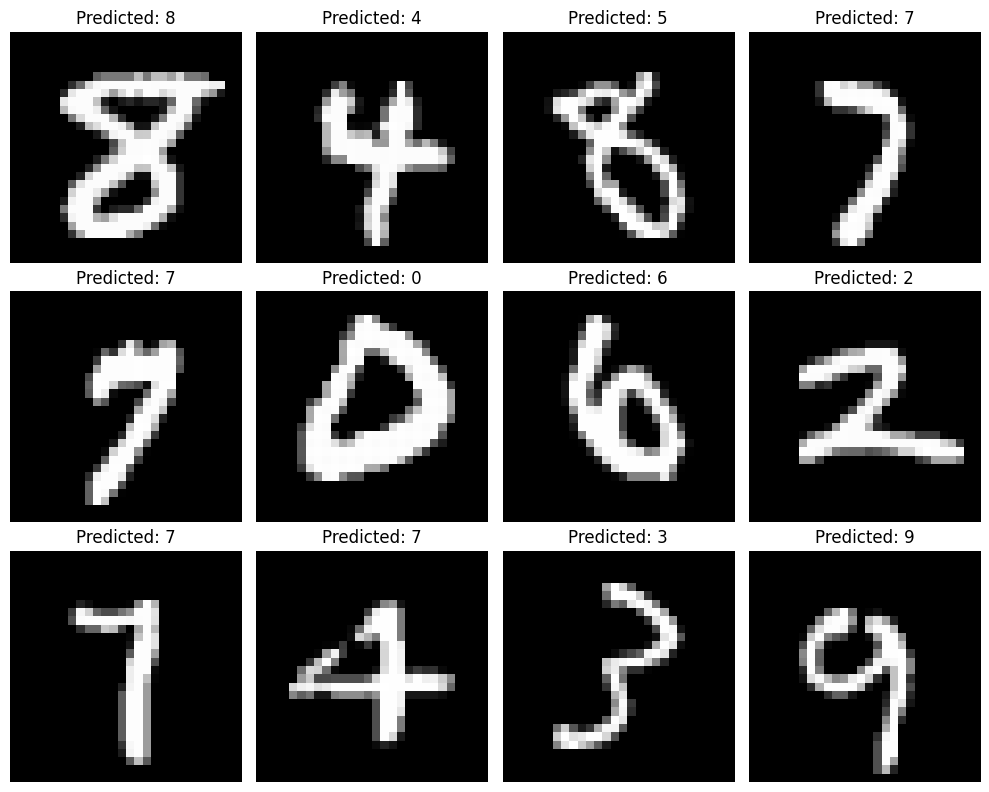

In [9]:
# Plot sample predictions
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()